**Heart Attack Analysis and Prediction Using ML**

In [ ]:
'''

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

'''

"\n\nAge : Age of the patient\n\nSex : Sex of the patient\n\nexang: exercise induced angina (1 = yes; 0 = no)\n\nca: number of major vessels (0-3)\n\ncp : Chest Pain type chest pain type\n\nValue 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic\ntrtbps : resting blood pressure (in mm Hg)\n\nchol : cholestoral in mg/dl fetched via BMI sensor\n\nfbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n\nrest_ecg : resting electrocardiographic results\n\nValue 0: normal\nValue 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\nValue 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\nthalach : maximum heart rate achieved\n\ntarget : 0= less chance of heart attack 1= more chance of heart attack\n\n"

In [ ]:
#1. DataSet = 'https://raw.githubusercontent.com/gandipriyanka09/DataSets/main/heart.csv'
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/gandipriyanka09/DataSets/main/heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape #303 - rows and 14 - columns

(303, 14)

In [ ]:
df.size

4242

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#To find how much people lie under which age
df.value_counts(['age'])

age
58     19
57     17
54     16
59     14
52     13
51     12
62     11
60     11
44     11
56     11
41     10
64     10
63      9
67      9
65      8
55      8
61      8
53      8
45      8
43      8
42      8
50      7
66      7
48      7
46      7
49      5
47      5
70      4
39      4
68      4
35      4
69      3
40      3
38      3
71      3
37      2
34      2
76      1
29      1
74      1
77      1
dtype: int64

In [ ]:
#To find how many males and females exist
df.value_counts(['sex'])

sex
1      207
0       96
dtype: int64

In [ ]:
#
df.groupby(['sex','age']).size()

sex  age
0    34     1
     35     1
     37     1
     39     2
     41     4
           ..
1    67     6
     68     3
     69     2
     70     4
     77     1
Length: 73, dtype: int64

<ipython-input-29-1ef522f2aadf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

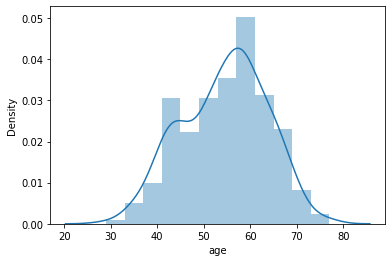

In [ ]:
#Visualization

import seaborn as sns
sns.distplot(df['age'])

In [ ]:
#Chest Pain
ChestPainType = df['cp'].value_counts()
ChestPainType

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [ ]:
#checking how many null values are there in fasting blood sugar(fbs)
df[df['fbs'] == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#divide the data into i/p and o/p
#input - All the columns except the output column
#output - output
x = df.iloc[:,:-1].values
y=df.iloc[:, -1].values

In [ ]:
#TRAIN and TEST VARIABLES
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x.shape) 
print(x_train.shape) 
print(x_test.shape) 

(303, 13)
(227, 13)
(76, 13)


In [ ]:
print(y.shape) 
print(y_train.shape) 
print(y_test.shape)

(303,)
(227,)
(76,)


In [ ]:
#We are applying logistic regression because the predicted output will be either 0 or 1
#0= less chance of heart attack 1= more chance of heart attack
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
#Fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Predict the output
y_pred = model.predict(x_test)
y_pred #PREDCITED VALUES

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
y_test #actual values

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)* 100

82.89473684210526

In [ ]:
#Individual Prediction
a = scaler.transform([[57,1,0,140,192,0,1,148,0,0.4,1,0,1]])

In [ ]:
model.predict(a)

array([0])

In [ ]:
b = scaler.transform([[63,0,0,124,197,0,1,136,1,0.0,1,0,2]])

In [ ]:
model.predict(b)

array([0])